In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Binary Classificiation

In [2]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


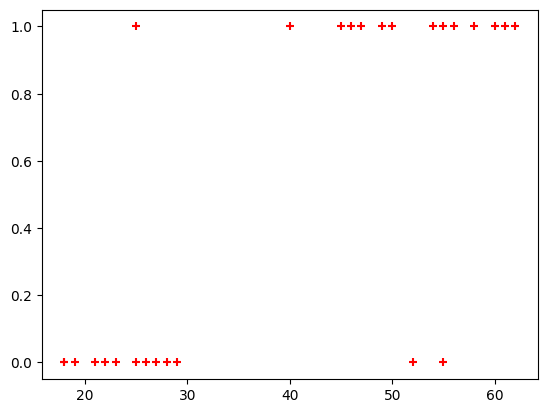

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
X_test

,age
9,61
1,25
24,50


In [9]:
model.predict(X_test)

array([1, 0, 1])

In [10]:
model.score(X_test, y_test)

1.0

In [11]:
model.predict_proba(X_test)

array([[0.05972927, 0.94027073],
       [0.85439176, 0.14560824],
       [0.20206181, 0.79793819]])

In [12]:
model.predict([[50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# Multiclass Classification

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [15]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

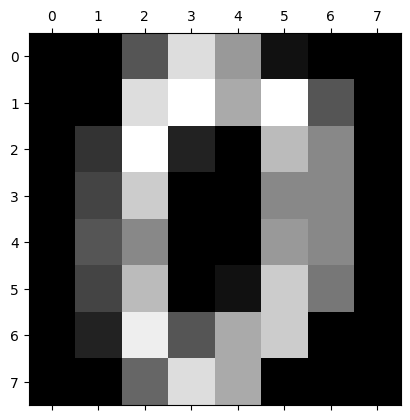

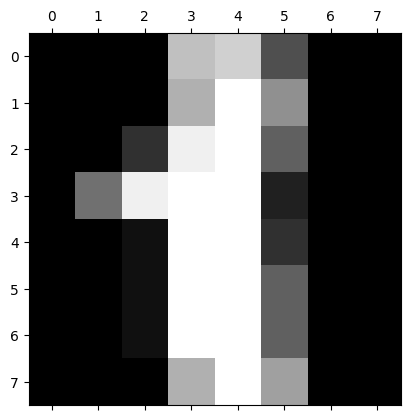

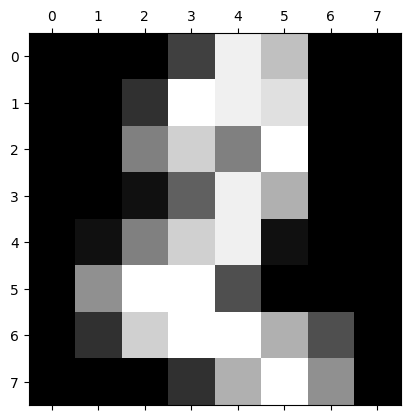

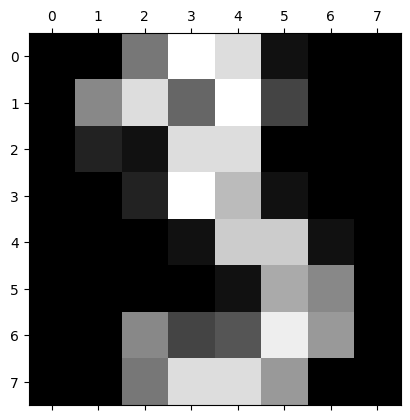

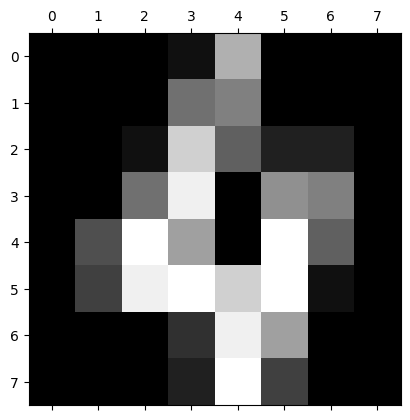

In [20]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [21]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
model.score(X_test, y_test)

0.9694444444444444

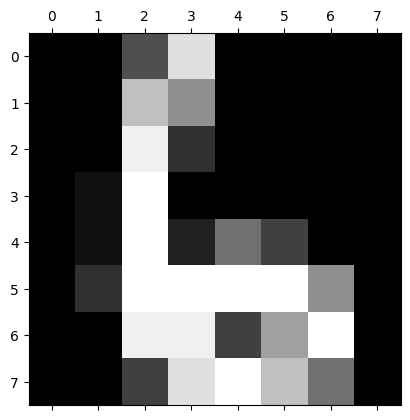

In [33]:
plt.matshow(digits.images[67])

In [34]:
digits.target[67]

6

In [35]:
model.predict([digits.data[67]])

array([6])

In [36]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [37]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  1,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0, 34]])

Text(95.72222222222221, 0.5, 'Truth')

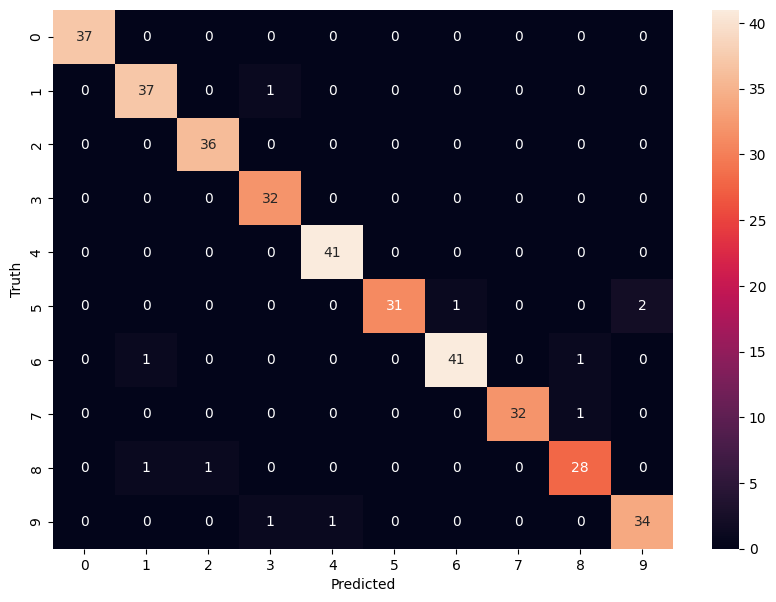

In [38]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')